# Homework: 

### The Exclusive OR (XOR)

Consider the classical Exlusive Or (XOR) [problem](https://en.wikipedia.org/wiki/Exclusive_or) involving two inputs  **x1**  and  **x2**  where  $x_i ∈ (0,1)$.

This problem states that the output should be 1 if exactly one of the inputs is 1 and 0 otherwise. Thus this problem has a very simple known input-output relationship

**x1** | **x2** | **Output**
------------|-------------|-------
 0 | 0 | 0
 1 | 0 | 1 
 0 | 1 | 1 
 1 | 1 | 0

The XOR network is typically presented as having 2 input nodes, 2 hidden layer nodes, and one output node.

Your output layer will have a single node. You will interpret the out values as being 0 (or false) for output values less than 0 and 1 (or true) for output values greater than 0.

Use `calysto` as we did for the AND to solve the Exclusive OR problem. In other words, program an [auto-encoder](https://en.wikipedia.org/wiki/Autoencoder) (generative model) for XOR.

*Then*, download a dataset of your choice from the Web, and *learn it* with `calysto` (auto-encode it). Use that model to predict something useful, like how to find a girlfriend or boyfriend.

## Design

For the XOR experiment, I will create a 2-3-1 network:

* input layer consisting of two units
* hidden layer of three (arbitrary, but not too big)
* output layer of one unit

## 1. Create a 2-3-1 network

In [7]:
from calysto.ai.conx import *

net = Network()
net.addLayers(2, 3, 1) #input 2, hidden 3, output 1
net

Conx using seed: 1575552455.6571045


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 3, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  
Layer 'input': (Kind: Input, Size: 2, Active: 1, Frozen: 0)
Activation: 0.00  0.00  

## 2. Propagate activation through the network

In [8]:
net.propagate(input=[100, 100])

array('d', [0.5043383396210688])

## 3. Untrained network
To see how an untrained network works on the AND problem, we can just propagate the input activations for each input pattern:

In [9]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

[0, 0] array('d', [0.5094171188800133])
[0, 1] array('d', [0.5093321809441035])
[1, 0] array('d', [0.5094434202198385])
[1, 1] array('d', [0.5093584624045445])


## 4. Train network

In [10]:
# provide training patterns (inputs and outputs)
net.setInputs([[0.0, 0.0],[0.0, 1.0],[1.0, 0.0],[1.0, 1.0]])
net.setOutputs([[0.0],[1.0],[1.0],[0.0]])

# set learning parameters
net.setEpsilon(0.5)
net.setTolerance(0.2)
net.setReportRate(1)

# learn
net.train()

Epoch #     1 | TSS Error: 1.0734 | Correct: 0.0000 | RMS Error: 0.5180
Epoch #     2 | TSS Error: 1.1437 | Correct: 0.0000 | RMS Error: 0.5347
Epoch #     3 | TSS Error: 1.0996 | Correct: 0.0000 | RMS Error: 0.5243
Epoch #     4 | TSS Error: 1.0555 | Correct: 0.0000 | RMS Error: 0.5137
Epoch #     5 | TSS Error: 1.1042 | Correct: 0.0000 | RMS Error: 0.5254
Epoch #     6 | TSS Error: 1.0521 | Correct: 0.0000 | RMS Error: 0.5129
Epoch #     7 | TSS Error: 1.0248 | Correct: 0.0000 | RMS Error: 0.5062
Epoch #     8 | TSS Error: 1.0932 | Correct: 0.0000 | RMS Error: 0.5228
Epoch #     9 | TSS Error: 1.0639 | Correct: 0.0000 | RMS Error: 0.5157
Epoch #    10 | TSS Error: 1.0780 | Correct: 0.0000 | RMS Error: 0.5191
Epoch #    11 | TSS Error: 1.0721 | Correct: 0.0000 | RMS Error: 0.5177
Epoch #    12 | TSS Error: 1.1899 | Correct: 0.0000 | RMS Error: 0.5454
Epoch #    13 | TSS Error: 1.0923 | Correct: 0.0000 | RMS Error: 0.5226
Epoch #    14 | TSS Error: 0.9965 | Correct: 0.0000 | RMS Error:

## 5. See the trained network

In [11]:
for pattern in [[0, 0], [0, 1], [1, 0], [1, 1]]:
    print(pattern, net.propagate(input=pattern))

[0, 0] array('d', [0.10004671679082548])
[0, 1] array('d', [0.8305555226266684])
[1, 0] array('d', [0.8486471746029247])
[1, 1] array('d', [0.10442836812367116])


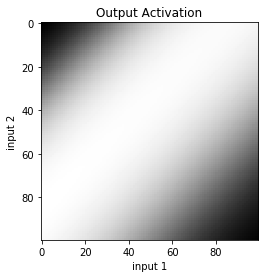

In [12]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
z = np.zeros((100, 100))

for x in range(100):
    for y in range(100):
        z[x][y] = net.propagate(input=[x/100, y/100])[0]

plt.imshow(z, cmap=plt.cm.gray, interpolation='nearest')
plt.xlabel("input 1")
plt.ylabel("input 2")
plt.title("Output Activation")

plt.show()

## Use ANN to predict stock price

## 1. Import data

I use [Alpha Vantage API](https://www.alphavantage.co/) to excract stock price of Apple

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
%matplotlib inline

In [3]:
dataset = pd.read_csv("https://www.alphavantage.co/query?function=TIME_SERIES_INTRADAY&outputsize=full&symbol=AAPL&interval=1min&apikey=G6JDX3PTNITW8EW1&datatype=csv")

In [4]:
dataset.head(10)

,timestamp,open,high,low,close,volume
0,2019-12-04 13:59:00,262.2800,262.2901,262.2385,262.2799,13270
1,2019-12-04 13:58:00,262.1700,262.2600,262.1399,262.2600,14927
2,2019-12-04 13:57:00,262.1100,262.1731,262.0900,262.1700,10969
3,2019-12-04 13:56:00,262.1600,262.1600,262.1000,262.1200,22940
4,2019-12-04 13:55:00,262.1300,262.1700,262.1200,262.1500,12262
5,2019-12-04 13:54:00,262.1800,262.1900,262.1000,262.1348,12575
6,2019-12-04 13:53:00,262.1400,262.2068,262.1400,262.1859,18069
7,2019-12-04 13:52:00,262.1400,262.1400,262.0984,262.1300,18662
8,2019-12-04 13:51:00,262.2121,262.2121,262.1300,262.1300,11294
9,2019-12-04 13:50:00,262.1800,262.2400,262.1700,262.2100,11522


In [5]:
dataset['rise']=0

In [6]:
dataset.loc[dataset.close > dataset.open, 'rise'] = 1 

If the stock is rise in close thant open, i consider it rise

In [7]:
dataset.tail(10)

,timestamp,open,high,low,close,volume,rise
1608,2019-11-27 09:40:00,265.7500,265.7950,265.7500,265.7500,68946,0
1609,2019-11-27 09:39:00,265.6000,265.7565,265.5300,265.7565,56984,1
1610,2019-11-27 09:38:00,265.5600,265.7760,265.5600,265.7760,83943,1
1611,2019-11-27 09:37:00,265.4632,265.5500,265.4000,265.5500,91298,1
1612,2019-11-27 09:36:00,265.6700,265.6700,265.4432,265.4432,77867,0
1613,2019-11-27 09:35:00,265.8300,265.8300,265.6550,265.6550,75287,0
1614,2019-11-27 09:34:00,265.8200,265.8200,265.8200,265.8200,113765,0
1615,2019-11-27 09:33:00,265.9507,266.2248,265.9246,265.9257,107067,0
1616,2019-11-27 09:32:00,265.6600,265.9800,265.4610,265.9400,129444,1
1617,2019-11-27 09:31:00,265.5800,265.8800,265.3500,265.6650,563056,1


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1618 entries, 0 to 1617
Data columns (total 7 columns):
timestamp    1618 non-null object
open         1618 non-null float64
high         1618 non-null float64
low          1618 non-null float64
close        1618 non-null float64
volume       1618 non-null int64
rise         1618 non-null int64
dtypes: float64(4), int64(2), object(1)
memory usage: 88.6+ KB


In [19]:
time_close = dataset.iloc[:,[0,4]]
# dataset["timestamp","close"]
time_close.head(10)

,timestamp,close
0,2019-12-04 13:59:00,262.2799
1,2019-12-04 13:58:00,262.2600
2,2019-12-04 13:57:00,262.1700
3,2019-12-04 13:56:00,262.1200
4,2019-12-04 13:55:00,262.1500
5,2019-12-04 13:54:00,262.1348
6,2019-12-04 13:53:00,262.1859
7,2019-12-04 13:52:00,262.1300
8,2019-12-04 13:51:00,262.1300
9,2019-12-04 13:50:00,262.2100


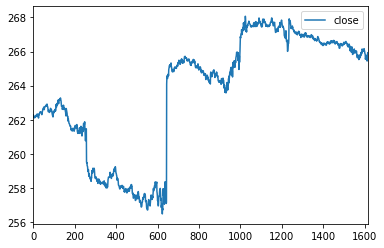

In [20]:
time_close.plot()

I want to make "open,high,low" these three columns as input. And predict the close price.

In [21]:
inputs = dataset.iloc[0:500,[1,2,3]].values.tolist()

In [22]:
inputs

[[262.28, 262.2901, 262.2385],
 [262.17, 262.26, 262.1399],
 [262.11, 262.1731, 262.09],
 [262.16, 262.16, 262.1],
 [262.13, 262.17, 262.12],
 [262.18, 262.19, 262.1],
 [262.14, 262.2068, 262.14],
 [262.14, 262.14, 262.0984],
 [262.2121, 262.2121, 262.13],
 [262.18, 262.24, 262.17],
 [262.23, 262.24, 262.15],
 [262.22, 262.245, 262.1782],
 [262.2401, 262.2776, 262.2246],
 [262.25, 262.29, 262.23],
 [262.28, 262.29, 262.23],
 [262.2069, 262.33, 262.2069],
 [262.2, 262.2, 262.14],
 [262.3288, 262.3294, 262.2],
 [262.33, 262.35, 262.33],
 [262.32, 262.39, 262.32],
 [262.215, 262.3462, 262.21],
 [262.25, 262.2569, 262.22],
 [262.21, 262.24, 262.19],
 [262.1995, 262.24, 262.1915],
 [262.08, 262.2, 262.08],
 [262.2573, 262.2573, 262.1],
 [262.34, 262.38, 262.26],
 [262.29, 262.3617, 262.29],
 [262.33, 262.34, 262.28],
 [262.36, 262.365, 262.25],
 [262.4, 262.4073, 262.3301],
 [262.46, 262.46, 262.34],
 [262.46, 262.49, 262.43],
 [262.4353, 262.46, 262.39],
 [262.44, 262.45, 262.4001],
 [262.

In [23]:
outputs = dataset.iloc[0:500,[6]].values.tolist()


In [24]:
outputs

[[0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1]

## 2. Create a network

In [76]:
from calysto.ai.conx import *

stockNet = Network()
stockNet.addLayers(3, 6, 1) #input 3, hidden 3, output 1
stockNet

Conx using seed: 1575550932.4842913


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 6, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  0.00  0.00  0.00  
Layer 'input': (Kind: Input, Size: 6, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  0.00  0.00  0.00  

In [ ]:
# provide training patterns (inputs and outputs)
stockNet.setInputs(inputs)
stockNet.setOutputs(outputs)

# set learning parameters
stockNet.setEpsilon(0.5)
stockNet.setTolerance(0.2)
stockNet.setReportRate(1)

# learn
stockNet.train()

Ok, it doesn't work very well.

## Use breast_cancer data

In [77]:
from sklearn.datasets import load_breast_cancer
data = load_breast_cancer()

In [78]:
X = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.DataFrame(data.target)

In [79]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 30 columns):
mean radius                569 non-null float64
mean texture               569 non-null float64
mean perimeter             569 non-null float64
mean area                  569 non-null float64
mean smoothness            569 non-null float64
mean compactness           569 non-null float64
mean concavity             569 non-null float64
mean concave points        569 non-null float64
mean symmetry              569 non-null float64
mean fractal dimension     569 non-null float64
radius error               569 non-null float64
texture error              569 non-null float64
perimeter error            569 non-null float64
area error                 569 non-null float64
smoothness error           569 non-null float64
compactness error          569 non-null float64
concavity error            569 non-null float64
concave points error       569 non-null float64
symmetry error             569 

In [80]:
y

,0
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


In [71]:
stockNet = Network()
stockNet.addLayers(6, 6, 1) #input 3, hidden 3, output 1
stockNet

Conx using seed: 1575576213.7923448


Layer 'output': (Kind: Output, Size: 1, Active: 1, Frozen: 0)
Target    : 0.00  
Activation: 0.00  
Layer 'hidden': (Kind: Hidden, Size: 6, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  0.00  0.00  0.00  
Layer 'input': (Kind: Input, Size: 3, Active: 1, Frozen: 0)
Activation: 0.00  0.00  0.00  

In [72]:
stockNet.propagate(input=[0, 0,0])

array('d', [0.5196775655788867])

In [81]:
inputs = X.iloc[:,[1,2,3,4,5,6]].values.tolist()
outputs = y.values.tolist()

In [82]:
outputs

[[0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [0],
 [0],
 [1],
 [0],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [1],
 [0],
 [1],
 [1],
 [1],
 [1],
 [0],
 [0],
 [1],
 [0],
 [1],
 [1]

In [83]:
# provide training patterns (inputs and outputs)
stockNet.setInputs(inputs)
stockNet.setOutputs(outputs)

# set learning parameters
stockNet.setEpsilon(0.5)
stockNet.setTolerance(0.2)
stockNet.setReportRate(1)

# learn
stockNet.train()

Epoch #     1 | TSS Error: 163.0278 | Correct: 0.2707 | RMS Error: 0.5353
Epoch #     2 | TSS Error: 160.1014 | Correct: 0.2214 | RMS Error: 0.5304
Epoch #     3 | TSS Error: 149.0634 | Correct: 0.1828 | RMS Error: 0.5118
Epoch #     4 | TSS Error: 161.3413 | Correct: 0.2636 | RMS Error: 0.5325
Epoch #     5 | TSS Error: 167.2612 | Correct: 0.2496 | RMS Error: 0.5422
Epoch #     6 | TSS Error: 158.7800 | Correct: 0.1318 | RMS Error: 0.5283
Epoch #     7 | TSS Error: 159.8075 | Correct: 0.2162 | RMS Error: 0.5300
Epoch #     8 | TSS Error: 164.1647 | Correct: 0.2214 | RMS Error: 0.5371
Epoch #     9 | TSS Error: 167.9120 | Correct: 0.2004 | RMS Error: 0.5432
Epoch #    10 | TSS Error: 149.1783 | Correct: 0.1582 | RMS Error: 0.5120
Epoch #    11 | TSS Error: 164.5218 | Correct: 0.2091 | RMS Error: 0.5377
Epoch #    12 | TSS Error: 159.1853 | Correct: 0.1863 | RMS Error: 0.5289
Epoch #    13 | TSS Error: 159.7141 | Correct: 0.1740 | RMS Error: 0.5298
Epoch #    14 | TSS Error: 160.5000 | 

KeyboardInterrupt: 

I don't know why, the model's correct is still lower that 30%